1) Importação de bibliotecas e bases de dados necessárias

2) Pré-processamento de dados e Outliers

3) Data Analytics

4) Seleção das características e Análise Exploratória de dados

5) Criação dos modelos de Machine Learning

6) Comparação dos modelos de Machine Learning

7) Submissão dos Resultados

##### 1) Importação de bibliotecas e bases de dados necessárias

In [74]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [2]:
gender_sub = pd.read_csv('gender_submission.csv')
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [3]:
gender_sub.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
print(f'Total rows: {len(titanic_train)}')
titanic_train.head(5)

Total rows: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(f'Total rows: {len(titanic_test)}')
titanic_test.head(5)

Total rows: 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### 2) Pré-processamento de dados e Outliers



###### 2.1) Pré-processamento de dados

In [6]:
#Dropando a coluna 'Survival' do Dataset de train, para juntar os dois DataFrames para facilitar a etapa de Pré-processamento

titanic_train_clone = titanic_train #Clonando 'titanic_train' para evitar adulteração de dados
y_train = titanic_train_clone.Survived
titanic_train_clone.drop('Survived', axis = 1, inplace = True) #Dropando a coluna extra
titanic_train_clone.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_train_clone.shape

(891, 11)

In [8]:
# Combinando 'test' e 'train' para criar um Dataset único.

merged_data = pd.concat([titanic_train_clone, titanic_test], axis = 0, ignore_index= True)
print(f'Total rows: {len(merged_data)}')
merged_data.head(5)


Total rows: 1309


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


###### Obs.: Age, Fare, Cabin and Embarked have null values

In [10]:
merged_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
# Valores nulos
merged_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
# Convertendo todos os valores nulos para N/A em 'Cabin'
merged_data['Cabin'].fillna('N/A', inplace = True)

In [13]:
# Validando a manipulação de dados
merged_data['Cabin'].value_counts()

N/A                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [14]:
# Preenchendo valores nulos
merged_data['Fare'].fillna(merged_data['Fare'].mean(), inplace = True)
merged_data['Embarked'].fillna(merged_data['Embarked'].mode()[0], inplace = True)

In [15]:
age_anom_check = merged_data.query('Age % 1 != 0')
print(f'Number of Age anomalous cases: {len(age_anom_check)}')
age_anom_check

Number of Age anomalous cases: 308


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,N/A,Q
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,N/A,S
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,N/A,C
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,N/A,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,N/A,Q
...,...,...,...,...,...,...,...,...,...,...,...
1301,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,N/A,Q
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,N/A,S
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N/A,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,N/A,S


In [16]:
# Assumindo que 'Age' tem correlação com 'Title', vamos criar uma nova coluna para facilitar na manipulação de 'Age'

merged_data['Title'] = merged_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
merged_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S,Mr


In [17]:
for i in merged_data['Title'].unique():
    print(f'Classe: {i}, média de idade: {merged_data[merged_data["Title"] == i]["Age"].mean():.2f}')

Classe: Mr, média de idade: 32.25
Classe: Mrs, média de idade: 36.99
Classe: Miss, média de idade: 21.77
Classe: Master, média de idade: 5.48
Classe: Don, média de idade: 40.00
Classe: Rev, média de idade: 41.25
Classe: Dr, média de idade: 43.57
Classe: Mme, média de idade: 24.00
Classe: Ms, média de idade: 28.00
Classe: Major, média de idade: 48.50
Classe: Lady, média de idade: 48.00
Classe: Sir, média de idade: 49.00
Classe: Mlle, média de idade: 24.00
Classe: Col, média de idade: 54.00
Classe: Capt, média de idade: 70.00
Classe: the Countess, média de idade: 33.00
Classe: Jonkheer, média de idade: 38.00
Classe: Dona, média de idade: 39.00


In [73]:
for i in merged_data.index:
  if pd.isnull(merged_data['Age'][i]):
    merged_data['Age'][i] = round(merged_data[merged_data['Title'] == merged_data['Title'][i]]['Age'].mean(), 0)

In [19]:
# Validando
merged_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [20]:
# Transformando 'Age' em 'int'
def int_transforming(x):
    Age_mod = []
    Age_mod = int(x)
    return Age_mod

age_manipulated = [int_transforming(Age) for Age in merged_data.Age]
age_manipulated

value = merged_data # Clonando 'merged_data' para evitar adulteração de dados

value.insert(3, 'Age_mod', age_manipulated) # Adicionando como nova coluna
value.head()

,PassengerId,Pclass,Name,Age_mod,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",22,male,22.0,1,0,A/5 21171,7.2500,N/A,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",26,female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",35,male,35.0,0,0,373450,8.0500,N/A,S,Mr


In [21]:
# Validando
value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age_mod      1309 non-null   int64  
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [22]:
age_anom_valid = value.query('Age % 1 != 0')
print(f'Number of Age anomalous cases: {len(age_anom_valid)}')

Number of Age anomalous cases: 45


In [23]:
age_validation = value.query('Age_mod % 1 != 0')
print(f'Number of Age anomalous cases: {len(age_validation)}')

Number of Age anomalous cases: 0


##### 3) Data Analytics
 

###### 3.1) Criando um DataSet geral

In [24]:
titanic_ads = value.drop(['Age'], axis =1)
titanic_ads.rename(columns={'Age_mod':'Age'}, inplace = True)
titanic_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   int64  
 4   Sex          1309 non-null   object 
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 122.8+ KB


###### 3.2) Tratamento de dados

In [25]:
titanic_fixed_train = pd.concat([titanic_ads.sort_index().iloc[:891], y_train], axis = 1)
titanic_fixed_train.tail()

,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Survived
886,887,2,"Montvila, Rev. Juozas",27,male,0,0,211536,13.00,N/A,S,Rev,0
887,888,1,"Graham, Miss. Margaret Edith",19,female,0,0,112053,30.00,B42,S,Miss,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",22,female,1,2,W./C. 6607,23.45,N/A,S,Miss,0
889,890,1,"Behr, Mr. Karl Howell",26,male,0,0,111369,30.00,C148,C,Mr,1
890,891,3,"Dooley, Mr. Patrick",32,male,0,0,370376,7.75,N/A,Q,Mr,0


In [26]:
titanic_fixed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    int64  
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  Survived     891 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 90.6+ KB


##### 4) Seleção das características e Análise Exploratória de dados

###### 4.1) Análise de 'Pclass'

In [27]:
# Função para retornar um gráfico de uma variável em relação à coluna 'Survived'
def func(data, column, count = True):
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)

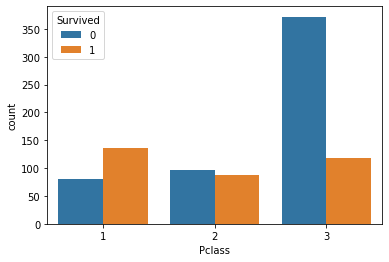

In [28]:
func(titanic_fixed_train, 'Pclass')

In [29]:
# A taxa de sobrevivência é consideravelmente maior quanto maior sua classe (1ª > 3ª)
# 'Pclass': Característica importante

###### 4.2) Análise de 'Sex'

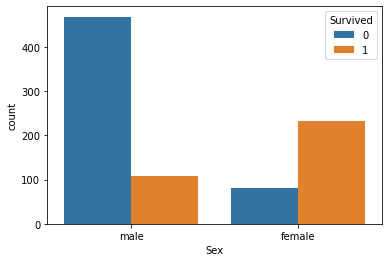

In [30]:
func(titanic_fixed_train, 'Sex')

In [31]:
# Mulheres possuem maior taxa de sobrevivência quando comparada à homens.
# 'Sex': Característica importante

###### 4.3) Análise de 'Embarked'

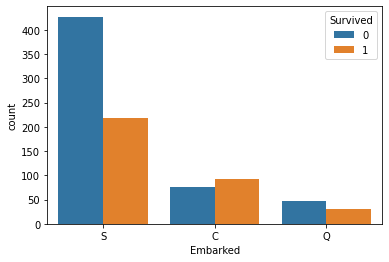

In [32]:
func(titanic_fixed_train, 'Embarked')

In [33]:
# Há uma clara diferença entre a cidade embarcada e a taxa de sobrevivência.]
# 'Embarked': Característica importante

###### 4.4) Análise de 'Cabin'

In [34]:
titanic_fixed_train['Cabin'].value_counts().sort_values(ascending= False)

N/A            687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
              ... 
C95              1
B101             1
B3               1
E77              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [35]:
# Muitos valores categóricos, impossibilitando uma análise clara, vamos criar uma coluna binária para facilitar a análise em relação à 'Survived' 
titanic_ads['Cabin'] = titanic_ads['Cabin'].apply(lambda x: 'Not Present' if x == 'N/A' else 'Present')
titanic_ads.head(5)

,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",22,male,1,0,A/5 21171,7.2500,Not Present,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,1,0,PC 17599,71.2833,Present,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",26,female,0,0,STON/O2. 3101282,7.9250,Not Present,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,1,0,113803,53.1000,Present,S,Mrs
4,5,3,"Allen, Mr. William Henry",35,male,0,0,373450,8.0500,Not Present,S,Mr


In [36]:
titanic_ads['Cabin'].value_counts()

Not Present    1014
Present         295
Name: Cabin, dtype: int64

In [37]:
# Fazendo a mesma coisa para 'titanic_fixed_train'
titanic_fixed_train['Cabin'] = titanic_fixed_train['Cabin'].apply(lambda x: 'Not Present' if x == 'N/A' else 'Present')

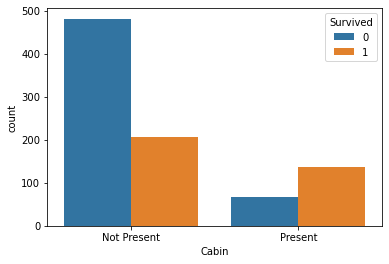

In [38]:
func(titanic_fixed_train, 'Cabin')

In [39]:
# Diferenças significantes entre 'Present' e 'Not Present'
# 'Cabin': Característica importante

###### 4.5) Análise de Fare 

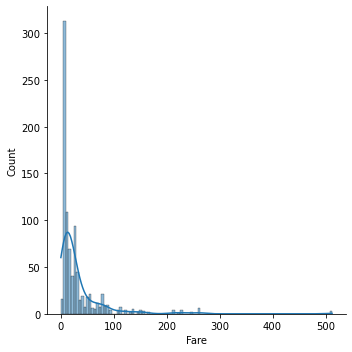

In [40]:
titanic_fixed_train['Fare'].value_counts().sort_values(ascending= False)
func(titanic_fixed_train, 'Fare', False)

In [41]:
# Criando quartis para melhor análise
Q1 = titanic_ads.Fare.quantile(0.25)  
Q2 = titanic_ads.Fare.quantile(0.50)
Q3 = titanic_ads.Fare.quantile(0.75)

print(f'\n Very Low Fare. Range: 0 - {Q1.round(2)}')
print(f'\n Low Fare. Range: {Q1.round(2)} - {Q2.round(2)}')
print(f'\n Medium Fare. Range: {Q2.round(2)} - {Q3.round(2)}')
print(f'\n High Fare. Range: {Q3.round(2)} - {round(max(titanic_ads.Fare), 2)}')

# Criando a nova coluna 'FareGroups' 
titanic_ads.insert(10, 'FareGroup', np.nan)

titanic_ads.loc[(titanic_ads['Fare'] < Q1), 'FareGroup'] = 'VeryLowFare'
titanic_ads.loc[(titanic_ads['Fare'] > Q1) & (titanic_ads['Fare'] < Q2), 'FareGroup'] = 'LowFare'
titanic_ads.loc[(titanic_ads['Fare'] > Q2) & (titanic_ads['Fare'] < Q3), 'FareGroup'] = 'MediumFare'
titanic_ads.loc[(titanic_ads['Fare'] > Q3), 'FareGroup'] = 'HighFare'

titanic_ads



 Very Low Fare. Range: 0 - 7.9

 Low Fare. Range: 7.9 - 14.45

 Medium Fare. Range: 14.45 - 31.28

 High Fare. Range: 31.28 - 512.33


,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,FareGroup,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",22,male,1,0,A/5 21171,7.2500,Not Present,VeryLowFare,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,1,0,PC 17599,71.2833,Present,HighFare,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",26,female,0,0,STON/O2. 3101282,7.9250,Not Present,LowFare,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,1,0,113803,53.1000,Present,HighFare,S,Mrs
4,5,3,"Allen, Mr. William Henry",35,male,0,0,373450,8.0500,Not Present,LowFare,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",32,male,0,0,A.5. 3236,8.0500,Not Present,LowFare,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",39,female,0,0,PC 17758,108.9000,Present,HighFare,C,Dona
1306,1307,3,"Saether, Mr. Simon Sivertsen",38,male,0,0,SOTON/O.Q. 3101262,7.2500,Not Present,VeryLowFare,S,Mr
1307,1308,3,"Ware, Mr. Frederick",32,male,0,0,359309,8.0500,Not Present,LowFare,S,Mr


In [42]:
# Fazendo a mesma coisa para 'titanic_fixed_train'
Q1 = titanic_fixed_train.Fare.quantile(0.25)  
Q2 = titanic_fixed_train.Fare.quantile(0.50)
Q3 = titanic_fixed_train.Fare.quantile(0.75) 

print(f'\n Very Low Fare. Range: 0 - {Q1.round(2)}')
print(f'\n Low Fare. Range: {Q1.round(2)} - {Q2.round(2)}')
print(f'\n Medium Fare. Range: {Q2.round(2)} - {Q3.round(2)}')
print(f'\n High Fare. Range: {Q3.round(2)} - {round(max(titanic_fixed_train.Fare), 2)}')

# Criando a nova coluna 'FareGroups' 
titanic_fixed_train.insert(10, 'FareGroup', np.nan)

titanic_fixed_train.loc[(titanic_fixed_train['Fare'] < Q1), 'FareGroup'] = 'VeryLowFare'
titanic_fixed_train.loc[(titanic_fixed_train['Fare'] > Q1) & (titanic_fixed_train['Fare'] < Q2), 'FareGroup'] = 'LowFare'
titanic_fixed_train.loc[(titanic_fixed_train['Fare'] > Q2) & (titanic_fixed_train['Fare'] < Q3), 'FareGroup'] = 'MediumFare'
titanic_fixed_train.loc[(titanic_fixed_train['Fare'] > Q3), 'FareGroup'] = 'HighFare'

titanic_fixed_train


 Very Low Fare. Range: 0 - 7.91

 Low Fare. Range: 7.91 - 14.45

 Medium Fare. Range: 14.45 - 31.0

 High Fare. Range: 31.0 - 512.33


,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,FareGroup,Embarked,Title,Survived
0,1,3,"Braund, Mr. Owen Harris",22,male,1,0,A/5 21171,7.2500,Not Present,VeryLowFare,S,Mr,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,1,0,PC 17599,71.2833,Present,HighFare,C,Mrs,1
2,3,3,"Heikkinen, Miss. Laina",26,female,0,0,STON/O2. 3101282,7.9250,Not Present,LowFare,S,Miss,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,1,0,113803,53.1000,Present,HighFare,S,Mrs,1
4,5,3,"Allen, Mr. William Henry",35,male,0,0,373450,8.0500,Not Present,LowFare,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27,male,0,0,211536,13.0000,Not Present,LowFare,S,Rev,0
887,888,1,"Graham, Miss. Margaret Edith",19,female,0,0,112053,30.0000,Present,MediumFare,S,Miss,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",22,female,1,2,W./C. 6607,23.4500,Not Present,MediumFare,S,Miss,0
889,890,1,"Behr, Mr. Karl Howell",26,male,0,0,111369,30.0000,Present,MediumFare,C,Mr,1


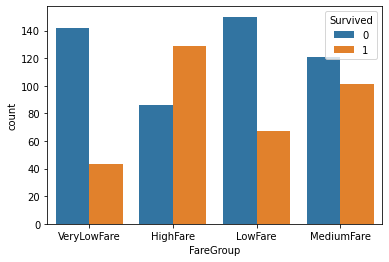

In [43]:
train_collated = pd.concat([titanic_ads.sort_index().iloc[:891], y_train], axis = 1)
func(train_collated, 'FareGroup')

In [44]:
# Quanto maior 'Fare', maior a taxa de sobrevivência
# 'Fare': Característica importante

###### 4.6) Análise de 'SibSp' e 'Parch'

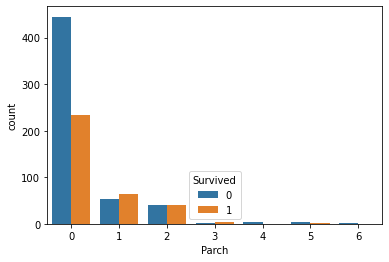

In [45]:
func(train_collated, 'Parch')

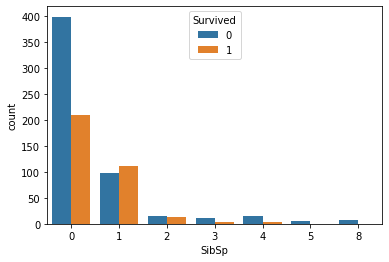

In [46]:
func(train_collated, 'SibSp')

In [47]:
# Criando uma nova variável 'FamilySize'
titanic_ads['FamilySize'] = 1 + titanic_ads['Parch'] + titanic_ads['SibSp']
titanic_ads

,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,FareGroup,Embarked,Title,FamilySize
0,1,3,"Braund, Mr. Owen Harris",22,male,1,0,A/5 21171,7.2500,Not Present,VeryLowFare,S,Mr,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,female,1,0,PC 17599,71.2833,Present,HighFare,C,Mrs,2
2,3,3,"Heikkinen, Miss. Laina",26,female,0,0,STON/O2. 3101282,7.9250,Not Present,LowFare,S,Miss,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,female,1,0,113803,53.1000,Present,HighFare,S,Mrs,2
4,5,3,"Allen, Mr. William Henry",35,male,0,0,373450,8.0500,Not Present,LowFare,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",32,male,0,0,A.5. 3236,8.0500,Not Present,LowFare,S,Mr,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",39,female,0,0,PC 17758,108.9000,Present,HighFare,C,Dona,1
1306,1307,3,"Saether, Mr. Simon Sivertsen",38,male,0,0,SOTON/O.Q. 3101262,7.2500,Not Present,VeryLowFare,S,Mr,1
1307,1308,3,"Ware, Mr. Frederick",32,male,0,0,359309,8.0500,Not Present,LowFare,S,Mr,1


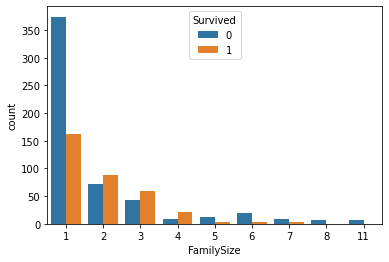

In [48]:
train_collated = pd.concat([titanic_ads.sort_index().iloc[:891], y_train], axis = 1)
func(train_collated, 'FamilySize')

In [49]:
# Nos valores 2 - 4, as pessoas possuem uma maior taxa de sobrevivência, em outros valores, essa taxa tende a cair
# Criando a nova coluna 'FamilyGroup' 
titanic_ads.insert(3, 'FamilyGroup', np.nan)

titanic_ads.loc[(titanic_ads['FamilySize'] == 1), 'FamilyGroup'] = 'Single'
titanic_ads.loc[(titanic_ads['FamilySize'] > 1) & (titanic_ads['FamilySize'] < 5), 'FamilyGroup'] = 'Medium'
titanic_ads.loc[(titanic_ads['FamilySize'] >= 5), 'FamilyGroup'] = 'Large'

titanic_ads['FamilyGroup'].value_counts()

Single    790
Medium    437
Large      82
Name: FamilyGroup, dtype: int64

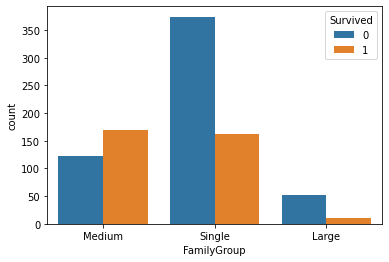

In [50]:
train_collated = pd.concat([titanic_ads.sort_index().iloc[:891], y_train], axis = 1)
func(train_collated, 'FamilyGroup')

In [51]:
# Claramente podem ser vistas diferentes relações entre a taxa de sobrevivência e os valores de 'FamilyGroup'
# 'FamilyGroup': Característica Importante

###### 4.7) Análise de 'Age':

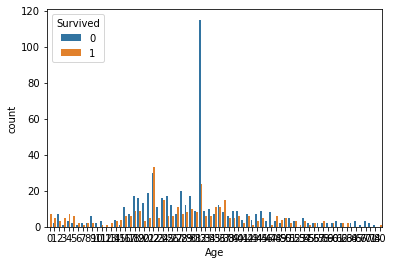

In [52]:
train_collated = pd.concat([titanic_ads.sort_index().iloc[:891], y_train], axis = 1)
func(train_collated, 'Age')

In [53]:
# Criando a nova coluna 'AgeGroup' 
titanic_ads.insert(3, 'AgeGroup', np.nan)

titanic_ads.loc[(titanic_ads['Age'] <= 18), 'AgeGroup'] = 'Young'
titanic_ads.loc[(titanic_ads['Age'] > 18) & (titanic_ads['FamilySize'] <= 60), 'AgeGroup'] = 'Adult'
titanic_ads.loc[(titanic_ads['Age'] > 60), 'AgeGroup'] = 'Old'

titanic_ads['AgeGroup'].value_counts()

Adult    1073
Young     204
Old        32
Name: AgeGroup, dtype: int64

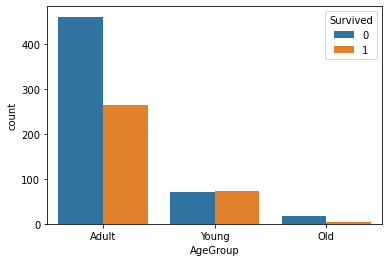

In [54]:
train_collated = pd.concat([titanic_ads.sort_index().iloc[:891], y_train], axis = 1)
func(train_collated, 'AgeGroup')

In [55]:
# Com o aumento da idade, a taxa de sobrevivência decresce
# 'AgeGroup': Característica Importante

###### 4.8) Análise de 'Title'

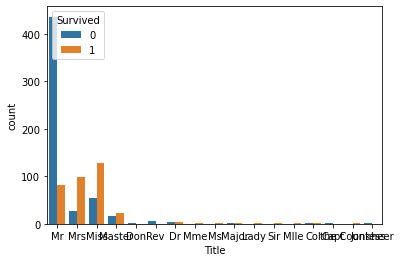

In [56]:
train_collated = pd.concat([titanic_ads.sort_index().iloc[:891], y_train], axis = 1)
func(train_collated, 'Title')

In [57]:
# Mesmo possuindo diferença na taxa de sobrevivência de acordo com o título, ele não se torna uma característica importante para a análise, já que essa diferença pode ser entendida por conta de outras características, como 'Age' e 'Sex'.
# 'Title' só foi uma coluna importante para auxiliar a preencher os dados de 'Age' que estavam em branco.

###### 4.9) Selecionando características importantes

In [58]:
titanic_features = titanic_ads

titanic_features.drop(['PassengerId', 'Name', 'Ticket', 'Parch', 'SibSp', 'FamilySize', 'Fare', 'Age', 'Title'], axis = 1, inplace = True) # Dropando características irrelevantes
titanic_features.head(5)

,Pclass,AgeGroup,FamilyGroup,Sex,Cabin,FareGroup,Embarked
0,3,Adult,Medium,male,Not Present,VeryLowFare,S
1,1,Adult,Medium,female,Present,HighFare,C
2,3,Adult,Single,female,Not Present,LowFare,S
3,1,Adult,Medium,female,Present,HighFare,S
4,3,Adult,Single,male,Not Present,LowFare,S


###### 4.10) Preparando para o modelo

In [59]:
titanic_encoded_features = pd.get_dummies(titanic_features, drop_first = False)

titanic_encoded_features.head(5)

,Pclass,AgeGroup_Adult,AgeGroup_Old,AgeGroup_Young,FamilyGroup_Large,FamilyGroup_Medium,FamilyGroup_Single,Sex_female,Sex_male,Cabin_Not Present,Cabin_Present,FareGroup_HighFare,FareGroup_LowFare,FareGroup_MediumFare,FareGroup_VeryLowFare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1


<AxesSubplot:>

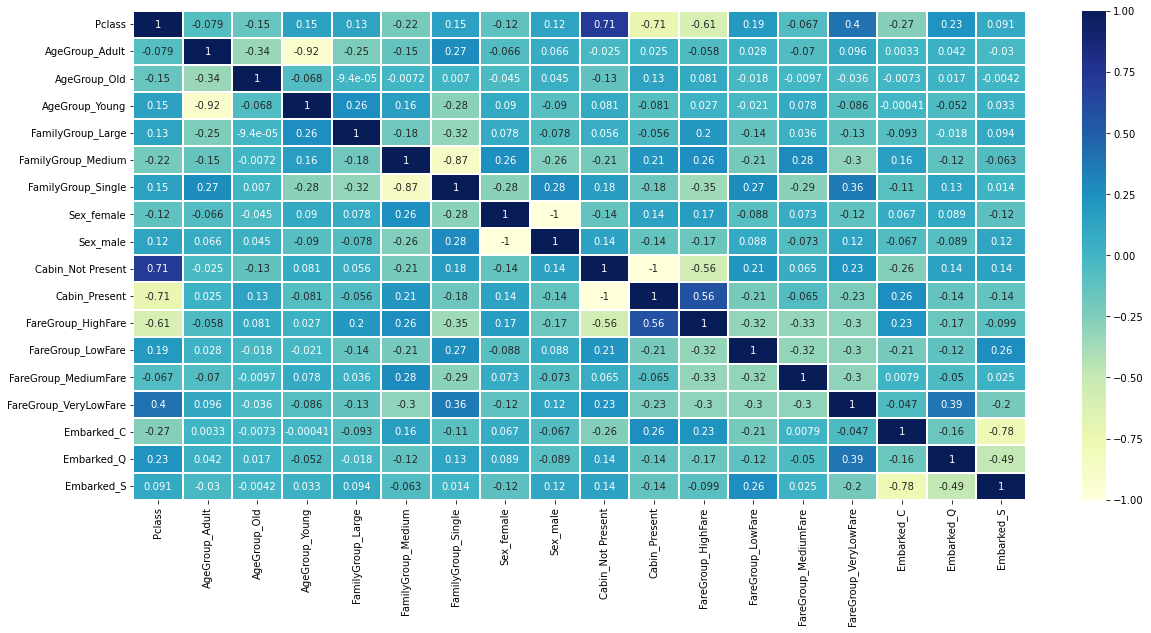

In [60]:
# Analisando correlações entre as variáveis
corrfeat = titanic_encoded_features.corr()

f, ax = plt.subplots(figsize = (20, 9))
sns.heatmap(corrfeat, ax = ax, cmap = 'YlGnBu', linewidths= 0.1, annot = True)

In [61]:
# Dropando algumas colunas que não fazem diferença (por ser uma variável binária com outro valor)
titanic_encoded_features.drop(['Sex_male', 'Cabin_Not Present'], axis = 1, inplace = True)
titanic_encoded_features.head(5)

,Pclass,AgeGroup_Adult,AgeGroup_Old,AgeGroup_Young,FamilyGroup_Large,FamilyGroup_Medium,FamilyGroup_Single,Sex_female,Cabin_Present,FareGroup_HighFare,FareGroup_LowFare,FareGroup_MediumFare,FareGroup_VeryLowFare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [62]:
# Escalando as características independentes
scaler = StandardScaler()
scaler.fit(titanic_encoded_features)
X = scaler.fit_transform(titanic_encoded_features)

##### 5) Criação dos modelos de Machine Learning

In [63]:
titanic_train_final = X[:891]
titanic_test_final = X[891:]

###### 5.1) Preparando o DataSet de treino em um DataSet sem a coluna 'Survival', para podermos testar nossos modelos

In [64]:
X_train, X_test, y_train, y_test = train_test_split(titanic_train_final, y_train, test_size = 0.20, random_state = 42)

###### 5.2) Regressão Logística

In [65]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f'Acurácia de treino utilizando Regressão Logística é de {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia de teste utilizando Regressão Logística é de {lr_acc}')

print(f'Confusion Matrix: \n {confusion_matrix(y_test, lr.predict(X_test))}')
print(f'Classification Report: \n {classification_report(y_test, lr.predict(X_test))}')

Acurácia de treino utilizando Regressão Logística é de 0.8230337078651685
Acurácia de teste utilizando Regressão Logística é de 0.8156424581005587
Confusion Matrix: 
 [[90 15]
 [18 56]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



###### 5.3) Decision Tree Classifier

In [66]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f'Acurácia de treino utilizando Decision Tree Classifier é de {accuracy_score(y_train, dtc.predict(X_train))}')
print(f'Acurácia de teste utilizando Decision Tree Classifier é de {dtc_acc}')

print(f'Confusion Matrix: \n {confusion_matrix(y_test, dtc.predict(X_test))}')
print(f'Classification Report: \n {classification_report(y_test, dtc.predict(X_test))}')

Acurácia de treino utilizando Decision Tree Classifier é de 0.875
Acurácia de teste utilizando Decision Tree Classifier é de 0.8100558659217877
Confusion Matrix: 
 [[88 17]
 [17 57]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



###### 5.4) Random Forest Classifier

In [67]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f'Acurácia de treino utilizando Random Forest Classifier é de {accuracy_score(y_train, rd_clf.predict(X_train))}')
print(f'Acurácia de teste utilizando Random Forest Classifier é de {rd_clf_acc}')

print(f'Confusion Matrix: \n {confusion_matrix(y_test, rd_clf.predict(X_test))}')
print(f'Classification Report: \n {classification_report(y_test, rd_clf.predict(X_test))}')

Acurácia de treino utilizando Random Forest Classifier é de 0.875
Acurácia de teste utilizando Random Forest Classifier é de 0.8324022346368715
Confusion Matrix: 
 [[89 16]
 [14 60]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



###### 5.5) Gradient Boosting Classifier

In [68]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f'Acurácia de treino utilizando Gradient Boosting Classifier é de {accuracy_score(y_train, gb.predict(X_train))}')
print(f'Acurácia de teste utilizando Gradient Boosting Classifier é de {gb_acc}')

print(f'Confusion Matrix: \n {confusion_matrix(y_test, gb.predict(X_test))}')
print(f'Classification Report: \n {classification_report(y_test, gb.predict(X_test))}')

Acurácia de treino utilizando Gradient Boosting Classifier é de 0.8595505617977528
Acurácia de teste utilizando Gradient Boosting Classifier é de 0.8156424581005587
Confusion Matrix: 
 [[90 15]
 [18 56]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



###### 5.6) Xg Boost Classifier

In [75]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180, use_label_encoder = False)
xgb.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f'Acurácia de treino utilizando XgBoost é de {accuracy_score(y_train, xgb.predict(X_train))}')
print(f'Acurácia de teste utilizando XgBoost é de {xgb_acc}')

print(f'Confusion Matrix: \n {confusion_matrix(y_test, xgb.predict(X_test))}')
print(f'Classification Report: \n {classification_report(y_test, xgb.predict(X_test))}')

[18:34:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia de treino utilizando XgBoost é de 0.8707865168539326
Acurácia de teste utilizando XgBoost é de 0.8268156424581006
Confusion Matrix: 
 [[90 15]
 [16 58]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



##### 6) Comparação dos modelos de Machine Learning

In [70]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XgBoost'],
    'Score': [lr_acc, dtc_acc, rd_clf_acc, gb_acc, xgb_acc]
})

models['Score'] = (models['Score'] * 100).round(2)

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,RandomForestClassifier,83.24
4,XgBoost,82.68
0,LogisticRegression,81.56
3,GradientBoostingClassifier,81.56
1,DecisionTreeClassifier,81.01


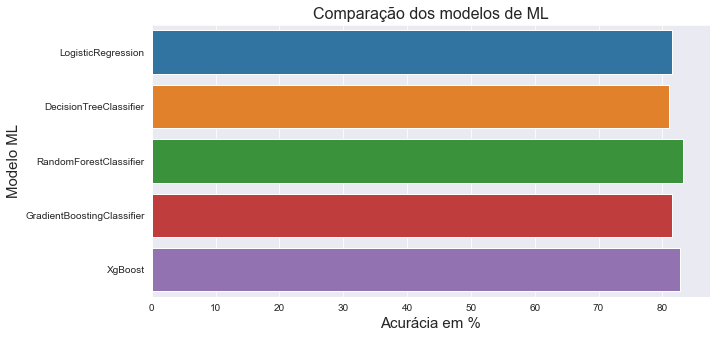

In [71]:
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Score', y = 'Model', data = models)

plt.xlabel('Acurácia em %', fontsize = 15)
plt.ylabel('Modelo ML', fontsize = 15)

plt.title('Comparação dos modelos de ML', fontsize = 16)

plt.show()

In [72]:
# Random Forest Classifier foi o escolhido como melhor modelo.

##### 7) Submissão dos resultados

In [75]:
rd_clf_prediction = rd_clf.predict(titanic_test_final)
prediction = pd.DataFrame(rd_clf_prediction)
prediction

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [76]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = prediction
submission.to_csv('Submission.csv', index = False)